#### Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

<div class="alert alert-block alert-info">
<b><font size="4"> Importing the Necessary Libraries</font></b>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

<div class="alert alert-block alert-info">
<b><font size="4">Data Acquisition</font></b>
<div>

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<div class="alert alert-block alert-info">
<b><font size="4">Data Preprocessing</font></b>
<div>

In [3]:
df["date"] = pd.to_datetime(df["date"])

# Extract and Create columns "year"
df["year"] = df["date"].dt.year

# how old the house is (home sold - year built)
df["difference"] = df["year"] - df["yr_built"]

# assign yr-renovated to either Renovated(1) or Not Renovated(0)
df["yr_renovated_new"] = np.where(df["yr_renovated"]==0,0,1)

df=df.drop(['id','date','yr_renovated','yr_built',"year"],axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,difference,yr_renovated_new
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0


In [4]:
# Checking the shape of the dataset after dropping the NaN values
df.shape

(21613, 19)

<div class="alert alert-block alert-info">
<b><font size="4"> Data Partitioning :</font></b>
    
Machine learning methods typically require splitting data into multiple chunks for training, validating, and finally testing for building and training a model
    <div>

In [5]:
X=df.drop(['price'],axis=1)
y=df['price']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [8]:
print(X_train_org.shape, y_train.shape)

(15129, 18) (15129,)


In [9]:
print(X_test_org.shape, y_test.shape)

(6484, 18) (6484,)


<div class="alert alert-block alert-info">
<b><font size="4"> Feature Scaling</font></b>
<div>

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

<div class="alert alert-block alert-info">
<b><font size="4"> Model Evaluation strategy (Metrics Selection)</font></b>

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import GridSearchCV

<div class="alert alert-block alert-info">
<b><font size="4">Ensemble Method (Bagging)</font></b>
    
- Linear Regression
- KNN Regression
<div>

Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

params_grid = {
    'max_features': [2, 5, 10],
    'n_estimators':[100, 200, 300, 500],
    'max_samples':[0.1, 0.5, 1]}

lreg_br = GridSearchCV(BaggingRegressor(LinearRegression(), random_state=0), params_grid, return_train_score=True, cv = 6, n_jobs=-1)
lreg_br.fit(X_train, y_train)
#6-fold cross validation instead of default 5

GridSearchCV(cv=6, error_score=nan,
             estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                        fit_intercept=True,
                                                                        n_jobs=None,
                                                                        normalize=False),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_features': [2, 5, 10],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 

In [14]:
lreg_br.score(X_test, y_test)
#R2 score

0.6619699384920907

In [15]:
print(f'Best parameters: {lreg_br.best_params_}')
print(f'Best cross-validation score: {lreg_br.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'max_features': 10, 'max_samples': 0.1, 'n_estimators': 200}
Best cross-validation score: 0.6785555205364812


In [16]:
result7=pd.DataFrame(lreg_br.cv_results_)
result7.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.752159,0.227136,0.040990,0.028061,2,0.1,100,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.355975,0.375132,0.369507,0.345147,0.372865,0.384470,0.367183,0.012980,22,0.365284,0.375527,0.366021,0.364176,0.365492,0.365110,0.366935,0.003882
1,0.765687,0.032137,0.030278,0.003801,2,0.1,200,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.351124,0.379841,0.367721,0.345470,0.373717,0.382396,0.366712,0.013920,23,0.364590,0.374034,0.366116,0.363378,0.364387,0.364324,0.366138,0.003622
2,1.080948,0.032900,0.041200,0.003645,2,0.1,300,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.360281,0.389304,0.375030,0.353845,0.382186,0.390645,0.375215,0.013934,20,0.373654,0.382832,0.374174,0.371956,0.372710,0.372413,0.374623,0.003746
3,1.907912,0.048367,0.073013,0.010194,2,0.1,500,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.363293,0.391302,0.377808,0.357319,0.385775,0.394191,0.378281,0.013803,17,0.376024,0.385591,0.376703,0.375189,0.376769,0.375850,0.377687,0.003574
4,0.405803,0.017577,0.014382,0.000914,2,0.5,100,"{'max_features': 2, 'max_samples': 0.5, 'n_est...",0.353504,0.374256,0.369068,0.347867,0.375268,0.386520,0.367747,0.013236,21,0.362245,0.374192,0.365832,0.366996,0.367841,0.367742,0.367475,0.003550
5,0.740850,0.008829,0.026237,0.000654,2,0.5,200,"{'max_features': 2, 'max_samples': 0.5, 'n_est...",0.349079,0.377800,0.365599,0.347056,0.374835,0.383542,0.366319,0.013963,24,0.362362,0.371888,0.364092,0.365070,0.365576,0.365673,0.365777,0.002955


In [17]:
pred = lreg_br.predict(X_test)
print('\nFor max features =', result7['param_max_features'][lreg_br.best_index_],', max samples =',result7['param_max_samples'][lreg_br.best_index_],', n_estimators =', result7['param_n_estimators'][lreg_br.best_index_],':')
print('\n\t• Cross validation Training score mean: ',result7['mean_train_score'][lreg_br.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,lreg_br.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For max features = 10 , max samples = 0.1 , n_estimators = 200 :

	• Cross validation Training score mean:  0.6812676061132917

	• Cross validation Testing score mean:  0.6785555205364812

	• R2 Score:  0.6619699384920907

	• Root Mean Squared Error:  215427.03371747019
----------------------------------------------------------------------------


<div class="alert alert-block alert-warning">
Let's Visualize the plot of the best fit line by the Linear Regression with Bagging Model below for a sample of data with only one x variable and y variable for simplicity:
    <div>

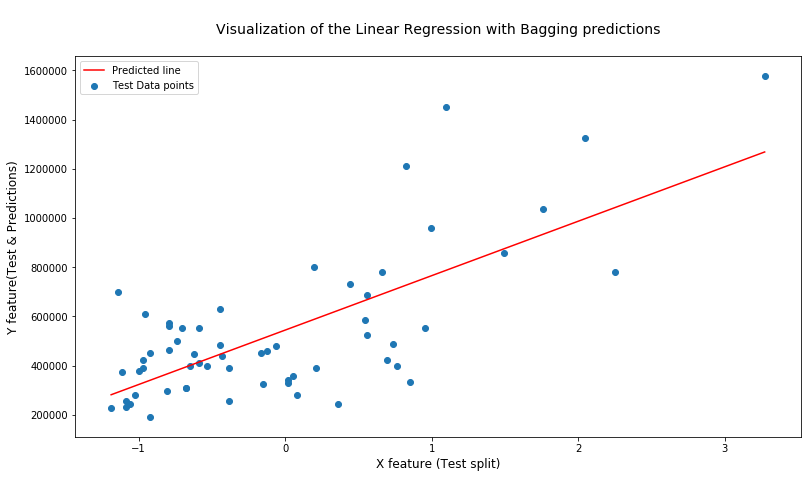

In [18]:
X_b = X_test[:60,14].reshape(-1,1)
y_b = y_test[:60]
lg = BaggingRegressor(LinearRegression(), n_estimators=300, bootstrap=True, random_state=0, oob_score = True)
lg.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =lg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the Linear Regression with Bagging predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Linear Regression with Bagging yields the best results when `max features = 10`, `max samples = 0.1`, and `n_estimators = 200`, which leads to the best R<sup>2</sup> score of `0.661969`.
<div>

KNN Regression

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

knn_rg = KNeighborsRegressor(n_neighbors = 6)
#Using best parameters from project 1

params_grid = {
    'max_features': [2, 5, 10],
    'n_estimators':[100, 200, 300, 500]}

knn_br = GridSearchCV(BaggingRegressor(knn_rg, bootstrap=True, random_state=0), params_grid, return_train_score=True, cv = 6, n_jobs=-1)
knn_br.fit(X_train, y_train)
#6-fold cross validation instead of default 5

GridSearchCV(cv=6, error_score=nan,
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                           leaf_size=30,
                                                                           metric='minkowski',
                                                                           metric_params=None,
                                                                           n_jobs=None,
                                                                           n_neighbors=6,
                                                                           p=2,
                                                                           weights='uniform'),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_

In [20]:
knn_br.score(X_test, y_test)
#R2 score

0.8032453730142395

In [21]:
print(f'Best parameters: {knn_br.best_params_}')
print(f'Best cross-validation score: {knn_br.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'max_features': 10, 'n_estimators': 300}
Best cross-validation score: 0.8067914585835824


In [22]:
result8=pd.DataFrame(knn_br.cv_results_)
result8.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,6.171646,0.074745,3.995931,0.053157,2,100,"{'max_features': 2, 'n_estimators': 100}",0.508732,0.512133,0.512904,0.484271,0.524560,0.538495,0.513516,0.016464,12,0.603296,0.611190,0.600804,0.598616,0.601436,0.604128,0.603245,0.003970
1,12.235057,0.264920,8.421676,0.195413,2,200,"{'max_features': 2, 'n_estimators': 200}",0.510696,0.528739,0.522350,0.496017,0.538956,0.546139,0.523816,0.016827,11,0.612679,0.620828,0.613953,0.610671,0.614809,0.617378,0.615053,0.003288
2,18.247946,0.063917,13.645609,0.556501,2,300,"{'max_features': 2, 'n_estimators': 300}",0.522447,0.541157,0.532397,0.507997,0.548378,0.557469,0.534974,0.016408,10,0.621318,0.628707,0.621934,0.619016,0.620914,0.624209,0.622683,0.003099
3,41.123902,7.162682,25.897548,3.011937,2,500,"{'max_features': 2, 'n_estimators': 500}",0.526000,0.547168,0.534465,0.513533,0.551339,0.560687,0.538865,0.015955,9,0.621950,0.629884,0.622154,0.620050,0.621786,0.625789,0.623602,0.003291
4,8.527325,0.919394,7.078400,1.283989,5,100,"{'max_features': 5, 'n_estimators': 100}",0.750409,0.741756,0.760371,0.740210,0.780136,0.774024,0.757818,0.015221,8,0.833773,0.838498,0.827923,0.829205,0.828177,0.832015,0.831599,0.003729
5,14.254960,0.551832,12.126434,0.136886,5,200,"{'max_features': 5, 'n_estimators': 200}",0.753604,0.755063,0.764888,0.747261,0.791895,0.782346,0.765843,0.016141,5,0.839132,0.842939,0.834434,0.835448,0.834282,0.838424,0.837443,0.003083


In [23]:
pred = knn_br.predict(X_test)
print('\nFor max features =', result8['param_max_features'][knn_br.best_index_], ', n_estimators =', result8['param_n_estimators'][knn_br.best_index_], ':')
print('\n\t• Cross validation Training score mean: ',result8['mean_train_score'][knn_br.best_index_])
print('\n\t• Cross validation Testing score mean: ',knn_br.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For max features = 10 , n_estimators = 300 :

	• Cross validation Training score mean:  0.867217657945022

	• Cross validation Testing score mean:  0.8067914585835824

	• R2 Score:  0.8032453730142395

	• Root Mean Squared Error:  164355.79312100256
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the KNN with Bagging 

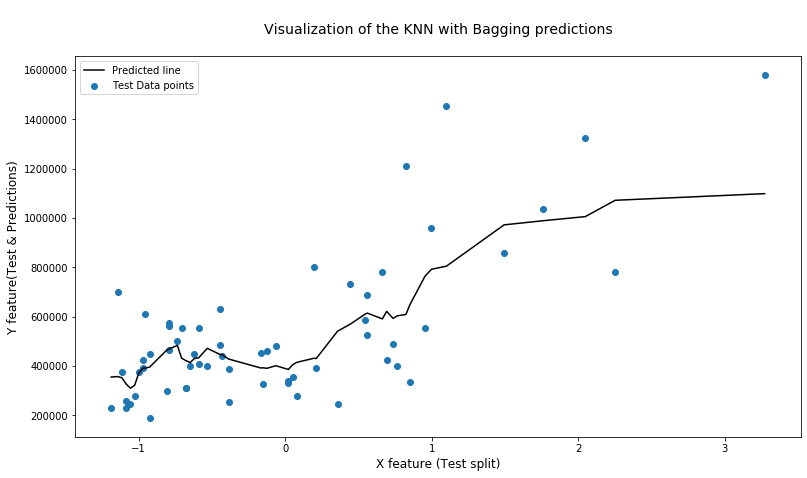

In [24]:
X_b = X_test[:60,14].reshape(-1,1)
y_b = y_test[:60]
lg = BaggingRegressor(knn_rg, n_estimators = 200, bootstrap=True, random_state=0, oob_score = True)
lg.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =lg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'k',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the KNN with Bagging predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the KNN with Bagging Model yields the best results when  `max features = 10`, and `n_estimators = 300`, which leads to the best R<sup>2</sup> score of `0.803245`.  
<div>

<div class="alert alert-block alert-info">
<b><font size="4">Ensemble Methods (Pasting)</font></b>
    
- LASSO Regression
- Decision Tree Regression
<div>

LASSO Regression

In [25]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=120)
#Using best parameters from project 1

params_grid = {
    'max_features': [2, 5, 10],
    'n_estimators':[100, 200, 300, 500],
    'max_samples':[0.1, 0.5, 1]}

lasso_p = GridSearchCV(BaggingRegressor(lasso_reg, bootstrap=False, random_state=0), params_grid, return_train_score=True, cv = 6, n_jobs=-1)
lasso_p.fit(X_train, y_train)
#6-fold cross validation instead of default 5

GridSearchCV(cv=6, error_score=nan,
             estimator=BaggingRegressor(base_estimator=Lasso(alpha=120,
                                                             copy_X=True,
                                                             fit_intercept=True,
                                                             max_iter=1000,
                                                             normalize=False,
                                                             positive=False,
                                                             precompute=False,
                                                             random_state=None,
                                                             selection='cyclic',
                                                             tol=0.0001,
                                                             warm_start=False),
                                        bootstrap=False,
                                        bootstrap_featur

In [26]:
lasso_p.score(X_test, y_test)
#R2 score

0.6625825482655285

In [27]:
print(f'Best parameters: {lasso_p.best_params_}')
print(f'Best cross-validation score: {lasso_p.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'max_features': 10, 'max_samples': 0.1, 'n_estimators': 200}
Best cross-validation score: 0.6796314243717111


In [28]:
result9=pd.DataFrame(lasso_p.cv_results_)
result9.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.253284,0.008571,0.015427,0.001734,2,0.1,100,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.386673,0.407545,0.402228,0.381312,0.408481,0.415736,0.400329,0.012299,19,0.397204,0.405746,0.399310,0.399350,0.399745,0.398539,0.399983,0.002706
1,0.501529,0.005634,0.027784,0.001837,2,0.1,200,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.382435,0.413172,0.400305,0.379952,0.408095,0.413788,0.399624,0.013777,20,0.398376,0.405249,0.398786,0.397621,0.397251,0.396089,0.398895,0.002968
2,0.748509,0.007985,0.044407,0.004402,2,0.1,300,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.387197,0.418821,0.404865,0.383248,0.410595,0.416967,0.403615,0.013809,17,0.402821,0.410745,0.403679,0.400862,0.399678,0.399450,0.402873,0.003843
3,1.360512,0.064209,0.071149,0.007046,2,0.1,500,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.382715,0.412474,0.399830,0.379242,0.406036,0.414012,0.399051,0.013618,22,0.396219,0.405288,0.399047,0.397060,0.396266,0.396232,0.398352,0.003257
4,0.332041,0.039078,0.016318,0.002925,2,0.5,100,"{'max_features': 2, 'max_samples': 0.5, 'n_est...",0.386104,0.407356,0.401097,0.379528,0.405919,0.414311,0.399052,0.012261,21,0.395901,0.405545,0.398455,0.397425,0.397415,0.397142,0.398647,0.003174
5,0.636426,0.010883,0.027902,0.002376,2,0.5,200,"{'max_features': 2, 'max_samples': 0.5, 'n_est...",0.379819,0.411938,0.398553,0.379110,0.406934,0.413569,0.398321,0.014163,24,0.394988,0.404016,0.397379,0.396767,0.396274,0.395820,0.397541,0.002990


In [29]:
pred = lasso_p.predict(X_test)
print('\nFor max features =', result9['param_max_features'][lasso_p.best_index_],', max samples =',result9['param_max_samples'][lasso_p.best_index_],', n_estimators =',result9['param_n_estimators'][lasso_p.best_index_],':')
print('\n\t• Cross validation Training score mean: ',result9['mean_train_score'][lasso_p.best_index_])
print('\n\t• Cross validation Testing score mean: ',lasso_p.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For max features = 10 , max samples = 0.1 , n_estimators = 200 :

	• Cross validation Training score mean:  0.6821821220793503

	• Cross validation Testing score mean:  0.6796314243717111

	• R2 Score:  0.6625825482655286

	• Root Mean Squared Error:  215231.73665823776
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the Lasso with Pasting 

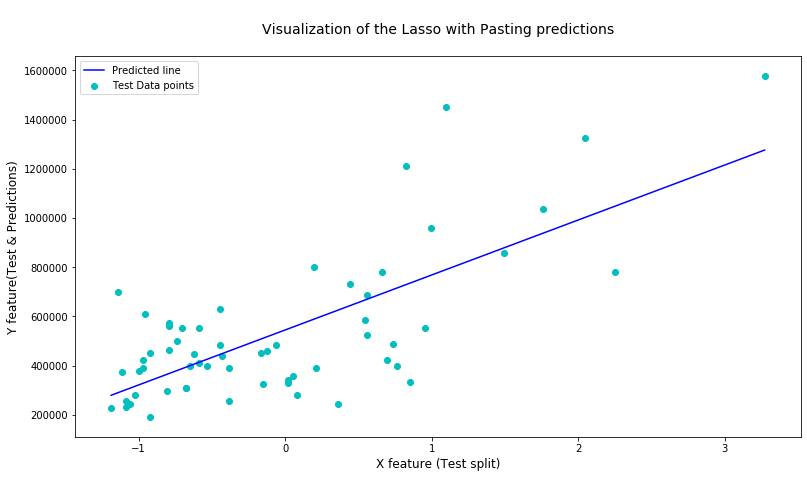

In [30]:
X_b = X_test[:60,14].reshape(-1,1)
y_b = y_test[:60]
lasso = BaggingRegressor(lasso_reg, n_estimators = 300, bootstrap=False, random_state=0)
lasso.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =lasso.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'b',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='c')
plt.title('\nVisualization of the Lasso with Pasting predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Lasso with Pasting Model yields the best results when  `max features = 10`, `max samples = 0.1`, and `n_estimators = 200`, which leads to the best R<sup>2</sup> score of `0.662582`.  
<div>

Decision Tree Regression

In [31]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
#baseline

params_grid = {
    'max_features': [2, 5, 10],
    'n_estimators':[100, 200, 300, 500],
    'max_samples':[0.1, 0.5, 1]}

dtree_p = GridSearchCV(BaggingRegressor(dtree, bootstrap=False, random_state=0), params_grid, return_train_score=True, cv = 6, n_jobs=-1)
dtree_p.fit(X_train, y_train)
#6-fold cross validation instead of default 5

GridSearchCV(cv=6, error_score=nan,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                             criterion='mse',
                                                                             max_depth=None,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_fr

In [32]:
dtree_p.score(X_test, y_test)
#R2 score

0.8667809823087473

In [33]:
print(f'Best parameters: {dtree_p.best_params_}')
print(f'Best cross-validation score: {dtree_p.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'max_features': 10, 'max_samples': 0.5, 'n_estimators': 300}
Best cross-validation score: 0.8560159108117587


In [34]:
result10=pd.DataFrame(dtree_p.cv_results_)
result10.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.470856,0.009454,0.046754,0.002883,2,0.1,100,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.521917,0.538743,0.540480,0.520137,0.552336,0.557754,0.538561,0.014014,24,0.592344,0.596541,0.593329,0.596043,0.596852,0.595376,0.595081,0.001675
1,0.907627,0.023212,0.082986,0.001182,2,0.1,200,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.524592,0.551829,0.539539,0.519741,0.557579,0.561358,0.542439,0.015903,23,0.594588,0.599024,0.596208,0.594194,0.596345,0.596990,0.596225,0.001594
2,1.346042,0.006472,0.122643,0.002272,2,0.1,300,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.531368,0.558857,0.545930,0.526792,0.561266,0.566403,0.548436,0.015067,21,0.599031,0.606260,0.602592,0.597328,0.596408,0.600456,0.600346,0.003326
3,2.238513,0.025306,0.206096,0.006078,2,0.1,500,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.530858,0.558832,0.543841,0.524219,0.555273,0.564748,0.546295,0.014776,22,0.596871,0.606205,0.601129,0.595901,0.595338,0.598320,0.598961,0.003752
4,1.345956,0.037470,0.056915,0.002711,2,0.5,100,"{'max_features': 2, 'max_samples': 0.5, 'n_est...",0.543517,0.556105,0.558009,0.535622,0.560062,0.571756,0.554178,0.011690,20,0.756861,0.763756,0.758387,0.755021,0.755720,0.758310,0.758009,0.002850
5,2.563645,0.047902,0.113793,0.005410,2,0.5,200,"{'max_features': 2, 'max_samples': 0.5, 'n_est...",0.541483,0.567920,0.556391,0.538449,0.562492,0.574659,0.556899,0.013207,19,0.746173,0.756653,0.749985,0.748222,0.748239,0.750099,0.749895,0.003294


In [35]:
pred = dtree_p.predict(X_test)
print('\nFor max features =', result10['param_max_features'][dtree_p.best_index_], ', max_samples =', result10['param_max_samples'][dtree_p.best_index_], ', n_estimators =', result10['param_n_estimators'][dtree_p.best_index_],':')
print('\n\t• Cross validation Training score mean: ',result10['mean_train_score'][dtree_p.best_index_])
print('\n\t• Cross validation Testing score mean: ',dtree_p.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For max features = 10 , max_samples = 0.5 , n_estimators = 300 :

	• Cross validation Training score mean:  0.9633946811632349

	• Cross validation Testing score mean:  0.8560159108117587

	• R2 Score:  0.8667809823087473

	• Root Mean Squared Error:  135240.15281698492
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the Decision Tree Regression with Pasting  

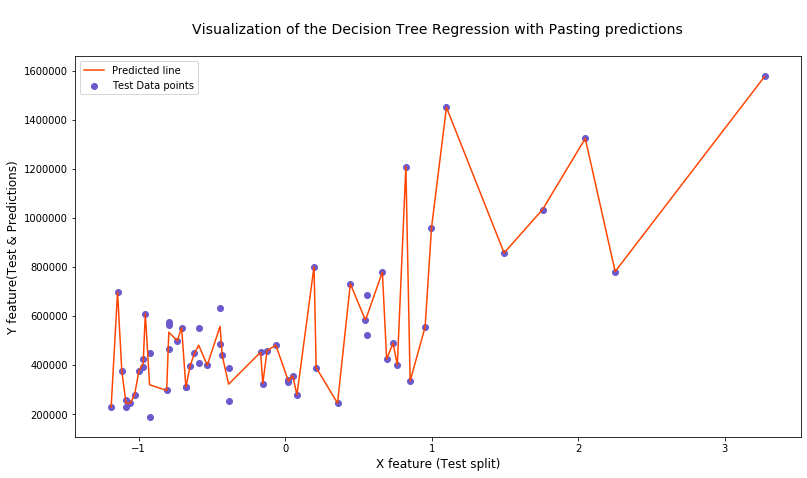

In [36]:
X_b = X_test[:60,14].reshape(-1,1)
y_b = y_test[:60]
dt_p = BaggingRegressor(dtree, n_estimators = 300, bootstrap=False, random_state=0)
dt_p.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =dt_p.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict,c = 'orangered',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='slateblue')
plt.title('\nVisualization of the Decision Tree Regression with Pasting predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the baseline Decision Tree Regression with Pasting Model yields the best results when  `max features = 10`, `max_samples = 0.5`, and `n_estimators = 300`, which leads to the best R<sup>2</sup> score of `0.866780`. This is the second best model that we have never attempt on project1. 
<div>

<div class="alert alert-block alert-info">
<b><font size="4">Adaboost Boosting Regression</font></b>
    
- Linear Regression
- Decision Tree Regression
<div>

Linear Regression

In [37]:
from sklearn.ensemble import AdaBoostRegressor

grid = {
    'learning_rate':[0.05, 0.1, 1],
    'n_estimators': [50, 150, 300],
    'loss': ["linear", "square"]}

ada_lr = GridSearchCV(AdaBoostRegressor(LinearRegression()), grid, return_train_score=True, cv=6, n_jobs=-1)
ada_lr.fit(X_train,y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                         fit_intercept=True,
                                                                         n_jobs=None,
                                                                         normalize=False),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 1],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 150, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [38]:
ada_lr.score(X_test, y_test)
#R2 score

0.6512825952345632

In [39]:
print(f'Best parameters: {ada_lr.best_params_}')
print(f'Best cross-validation score: {ada_lr.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 50}
Best cross-validation score: 0.6348900451275137


In [40]:
result11=pd.DataFrame(ada_lr.cv_results_)
result11.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.742776,0.058939,0.018338,0.003779,0.05,linear,50,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",0.692496,0.529278,0.645822,0.672526,0.623790,0.645430,0.634890,0.052030,1,0.664046,0.657158,0.648616,0.637221,0.641600,0.640671,0.648219,0.009594
1,2.041346,0.054979,0.061763,0.008732,0.05,linear,150,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",0.592119,0.324938,0.486365,0.558831,0.446730,0.459540,0.478087,0.085997,4,0.524905,0.521554,0.503048,0.494007,0.517054,0.486622,0.507865,0.014310
2,4.016201,0.407604,0.102424,0.013526,0.05,linear,300,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",0.552820,0.293106,0.472709,0.522899,0.383287,0.406721,0.438590,0.088091,7,0.478330,0.497406,0.488875,0.453912,0.465477,0.444265,0.471378,0.018739
3,0.772097,0.155955,0.017508,0.004185,0.05,square,50,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.625552,0.394592,0.535103,0.610720,0.513003,0.543401,0.537062,0.075472,2,0.563929,0.572235,0.551889,0.558865,0.568196,0.552041,0.561192,0.007683
4,2.497781,0.163608,0.059091,0.008652,0.05,square,150,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.436930,0.177448,0.438046,0.448408,0.283921,0.355335,0.356681,0.099075,12,0.344025,0.400470,0.444696,0.369335,0.397463,0.411773,0.394627,0.031737
5,4.854743,1.374241,0.220140,0.109923,0.05,square,300,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.390848,0.095463,0.377191,0.435181,0.251741,0.158537,0.284827,0.126016,16,0.284171,0.330482,0.383131,0.353868,0.367583,0.263420,0.330442,0.043469


In [41]:
pred = ada_lr.predict(X_test)
print('\nFor learning rate =',result11['param_learning_rate'][ada_lr.best_index_],', loss =',result11['param_loss'][ada_lr.best_index_], ', n_estimators =', result11['param_n_estimators'][ada_lr.best_index_],':')
print('\n\t• Cross validation Training score mean: ',result11['mean_train_score'][ada_lr.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,ada_lr.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For learning rate = 0.05 , loss = linear , n_estimators = 50 :

	• Cross validation Training score mean:  0.6482185947146938

	• Cross validation Testing score mean:  0.6348900451275137

	• R2 Score:  0.6512825952345631

	• Root Mean Squared Error:  218806.0626901041
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the  Adaboost Boosting with Linear Regression

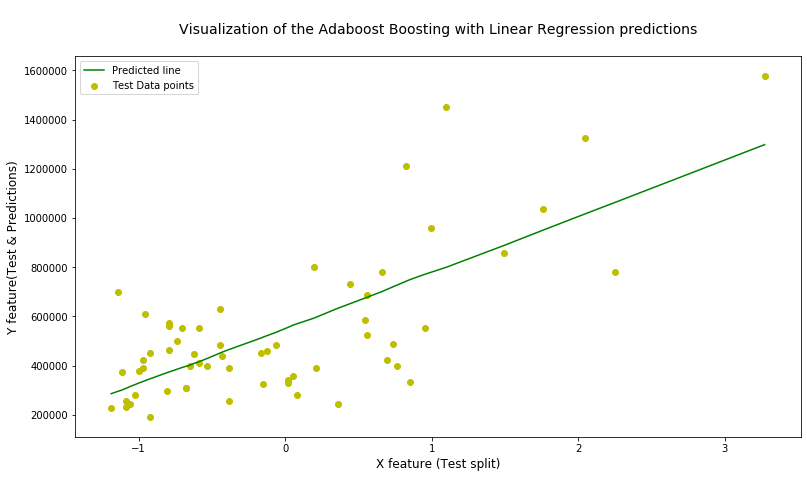

In [42]:
X_b = X_test[:60,14].reshape(-1,1)
y_b = y_test[:60]
ada1 = AdaBoostRegressor(LinearRegression(), learning_rate=0.05, n_estimators=50, loss= "linear", random_state=0)
ada1.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =ada1.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'g',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points', c='y')
plt.title('\nVisualization of the Adaboost Boosting with Linear Regression predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Adaboost Boosting with Linear Regression model yields the best results when `learning_rate = 0.05`, `n_estimators = 50`, and `loss = linear`, which leads to the best R<sup>2</sup> score of `0.651282`.
<div>

Decision Tree Regression

In [43]:
from sklearn.ensemble import AdaBoostRegressor

grid = {
    'learning_rate':[0.05, 0.1, 1],
    'n_estimators': [50, 150, 300],
    'loss': ["linear", "square"]}

ada_dtree = GridSearchCV(AdaBoostRegressor(LinearRegression()), grid, return_train_score=True, cv=6, n_jobs=-1)
ada_dtree.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                         fit_intercept=True,
                                                                         n_jobs=None,
                                                                         normalize=False),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 1],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 150, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [44]:
ada_dtree.score(X_test, y_test)
#R2 score

0.6581753222892912

In [45]:
print(f'Best parameters: {ada_dtree.best_params_}')
print(f'Best cross-validation score: {ada_dtree.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 50}
Best cross-validation score: 0.6303777743146575


In [46]:
result12=pd.DataFrame(ada_dtree.cv_results_)
result12.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.939204,0.049459,0.021548,0.004171,0.05,linear,50,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",0.694203,0.515440,0.645241,0.680227,0.605064,0.642092,0.630378,0.058833,1,0.665003,0.646139,0.648687,0.647960,0.630474,0.636549,0.645802,0.010819
1,3.045475,0.148694,0.067923,0.013558,0.05,linear,150,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",0.592671,0.320297,0.491561,0.556962,0.448144,0.475903,0.480923,0.086874,4,0.526709,0.518639,0.508206,0.491230,0.518366,0.502386,0.510923,0.011777
2,3.134467,0.577327,0.087266,0.021668,0.05,linear,300,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",0.551809,0.282390,0.464937,0.523721,0.391910,0.413816,0.438097,0.089396,7,0.479230,0.488919,0.479196,0.454490,0.477798,0.451568,0.471867,0.013832
3,0.651742,0.083441,0.015863,0.003012,0.05,square,50,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.633974,0.418090,0.528568,0.609178,0.512933,0.553004,0.542625,0.070083,2,0.576776,0.587409,0.546296,0.554604,0.568595,0.558672,0.565392,0.013849
4,2.327397,0.063846,0.072425,0.014442,0.05,square,150,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.443412,0.184461,0.443869,0.448056,0.281042,0.353906,0.359124,0.099017,12,0.349455,0.406630,0.451101,0.369066,0.397088,0.410784,0.397354,0.032274
5,4.181594,0.647890,0.130333,0.027906,0.05,square,300,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.392779,0.063009,0.382772,0.426838,0.248649,0.193133,0.284530,0.129314,16,0.286655,0.307449,0.389825,0.343575,0.361801,0.292433,0.330290,0.037799


In [47]:
pred = ada_dtree.predict(X_test)
print('\nFor learning rate =',result12['param_learning_rate'][ada_dtree.best_index_],', loss =',result12['param_loss'][ada_dtree.best_index_], ', n_estimators =', result12['param_n_estimators'][ada_dtree.best_index_])
print('\n\t• Cross validation Training score mean: ',result12['mean_train_score'][ada_dtree.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,ada_dtree.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For learning rate = 0.05 , loss = linear , n_estimators = 50

	• Cross validation Training score mean:  0.6458021660885244

	• Cross validation Testing score mean:  0.6303777743146575

	• R2 Score:  0.6581753222892912

	• Root Mean Squared Error:  216632.8163517771
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the  Adaboost Boosting with Decision Tree

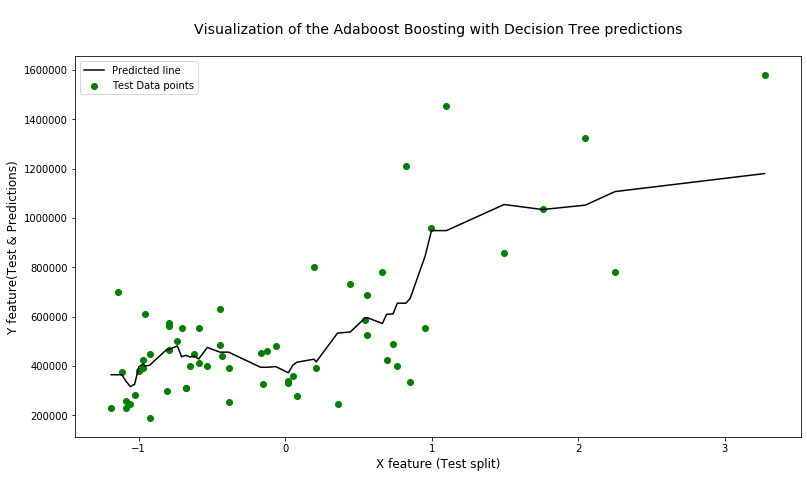

In [48]:
X_b = X_test[:60,14].reshape(-1,1)
y_b = y_test[:60]
ada2 = AdaBoostRegressor(knn_rg, learning_rate=0.05, n_estimators=50, loss= "linear", random_state=0)
ada2.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =ada2.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'k',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points', c='g')
plt.title('\nVisualization of the Adaboost Boosting with Decision Tree predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Adaboost Boosting with Decision Tree model yields the best results when `learning_rate = 0.05`, `n_estimators = 50`, and `loss = linear`, which leads to the best R<sup>2</sup> score of `0.658175`.
<div>

<div class="alert alert-block alert-info">
<b><font size="4">Gradient Boosting Regression</font></b>  
<div>

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

grid = {
    'learning_rate':[0.05, 0.1, 1],
    'n_estimators': [50, 100, 200],
    'max_depth':[1, 5, 10],
    'max_features':[2, 5, 10]}

gbrg = GridSearchCV(GradientBoostingRegressor(random_state = 0), grid, return_train_score=True, cv=6, n_jobs=-1)
gbrg.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [50]:
gbrg.score(X_test, y_test)
#R2 score

0.9029471269876539

In [51]:
print(f'Best parameters: {gbrg.best_params_}')
print(f'Best cross-validation score: {gbrg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 10, 'n_estimators': 200}
Best cross-validation score: 0.8842798550223127


In [52]:
result13=pd.DataFrame(gbrg.cv_results_)
result13.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.145831,0.022073,0.003170,0.001644,0.05,1,2,50,"{'learning_rate': 0.05, 'max_depth': 1, 'max_f...",0.435546,0.462819,0.453571,0.432282,0.475757,0.474682,0.455776,0.017187,81,0.458149,0.469655,0.458768,0.460439,0.458557,0.460715,0.461047,0.003966
1,0.255694,0.021498,0.003320,0.000091,0.05,1,2,100,"{'learning_rate': 0.05, 'max_depth': 1, 'max_f...",0.591483,0.589920,0.605814,0.586933,0.629909,0.624282,0.604723,0.016975,77,0.615764,0.628317,0.613661,0.613445,0.613455,0.615398,0.616673,0.005290
2,0.474503,0.015093,0.005342,0.000438,0.05,1,2,200,"{'learning_rate': 0.05, 'max_depth': 1, 'max_f...",0.691878,0.656695,0.680975,0.694093,0.717047,0.720053,0.693457,0.021502,60,0.713849,0.726532,0.715958,0.710377,0.712882,0.712592,0.715365,0.005261
3,0.212477,0.005884,0.002342,0.000100,0.05,1,5,50,"{'learning_rate': 0.05, 'max_depth': 1, 'max_f...",0.514601,0.529812,0.521754,0.507189,0.548906,0.546095,0.528060,0.015381,80,0.533531,0.543800,0.533603,0.533069,0.531150,0.535077,0.535038,0.004085
4,0.417953,0.003498,0.003971,0.001516,0.05,1,5,100,"{'learning_rate': 0.05, 'max_depth': 1, 'max_f...",0.642411,0.637850,0.650376,0.643640,0.673724,0.674090,0.653682,0.014763,69,0.665794,0.676038,0.664305,0.661593,0.662350,0.665041,0.665854,0.004782
5,0.853167,0.017615,0.005242,0.000146,0.05,1,5,200,"{'learning_rate': 0.05, 'max_depth': 1, 'max_f...",0.721088,0.692293,0.712332,0.731799,0.738490,0.744310,0.723385,0.017469,53,0.742475,0.752229,0.744814,0.739162,0.742582,0.741954,0.743869,0.004087


In [53]:
pred = gbrg.predict(X_test)
print('\nFor learning rate =',result13['param_learning_rate'][gbrg.best_index_],'\nFor max depth =',result13['param_max_depth'][gbrg.best_index_], '\nFor max features =', result13['param_max_features'][gbrg.best_index_], '\nFor max estimators =', result13['param_n_estimators'][gbrg.best_index_])
print('\n\t• Cross validation Training score mean: ',result13['mean_train_score'][gbrg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,gbrg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For learning rate = 0.1 
For max depth = 5 
For max features = 10 
For max estimators = 200

	• Cross validation Training score mean:  0.9619330926464902

	• Cross validation Testing score mean:  0.8842798550223127

	• R2 Score:  0.9029471269876539

	• Root Mean Squared Error:  115432.13741336363
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the  Gradient Boosting Model 

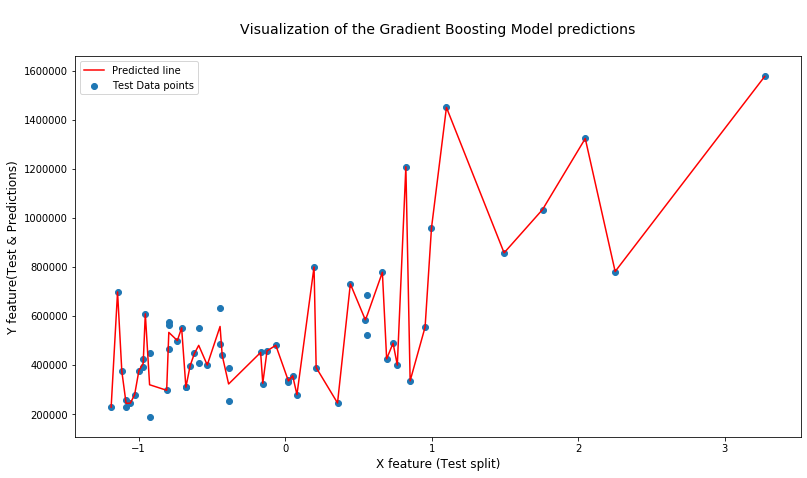

In [54]:
X_b = X_test[:60,14].reshape(-1,1)
y_b = y_test[:60]
gb = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=0)
gb.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =gb.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the Gradient Boosting Model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Gradient Boosting yields the best results when `learning rate = 0.1`, `max depth = 5`, `max features = 10`, and `n_estimators = 200`, which leads to the best R<sup>2</sup> score of `0.902947`. This is the best model amog all so far. 
<div>

<div class="alert alert-block alert-info">
<b><font size="5">Dimensionality Reduction</font></b>  
<div>

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
pca.n_components_
# 14 principal components is explained by 95% of the variance 

14

<div class="alert alert-block alert-info">
<b><font size="4">  KNN Regressor after PCA</font></b>

In [56]:
from sklearn.neighbors import KNeighborsRegressor
knnparameters = {'n_neighbors':range(3,12)}
reg = GridSearchCV(KNeighborsRegressor(), knnparameters,return_train_score=True, cv= 6, n_jobs=-1)
reg.fit(X_train_reduced, y_train)
#6-fold cross validation instead of default 5

GridSearchCV(cv=6, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(3, 12)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

In [57]:
reg.score(X_test_reduced, y_test)
#R2 score

0.780388864821006

In [58]:
print(f'Best parameters: {reg.best_params_}')
print(f'Best cross-validation score: {reg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.7860472936256055


In [59]:
results=pd.DataFrame(reg.cv_results_)

In [60]:
pred = reg.predict(X_test_reduced)
print('\nFor n_neighbors=',results['params'][reg.best_index_])
print('\n\t• Cross validation Training score mean: ',results['mean_train_score'][reg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,reg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For n_neighbors= {'n_neighbors': 7}

	• Cross validation Training score mean:  0.8444495631485123

	• Cross validation Testing score mean:  0.7860472936256055

	• R2 Score:  0.7803888648210059

	• Root Mean Squared Error:  173639.97624361728
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">     

    
From the above results we can see that the KNN model yields the best results when `K = 7` which leads to the best R<sup>2</sup> score of `0.780388`
<div>

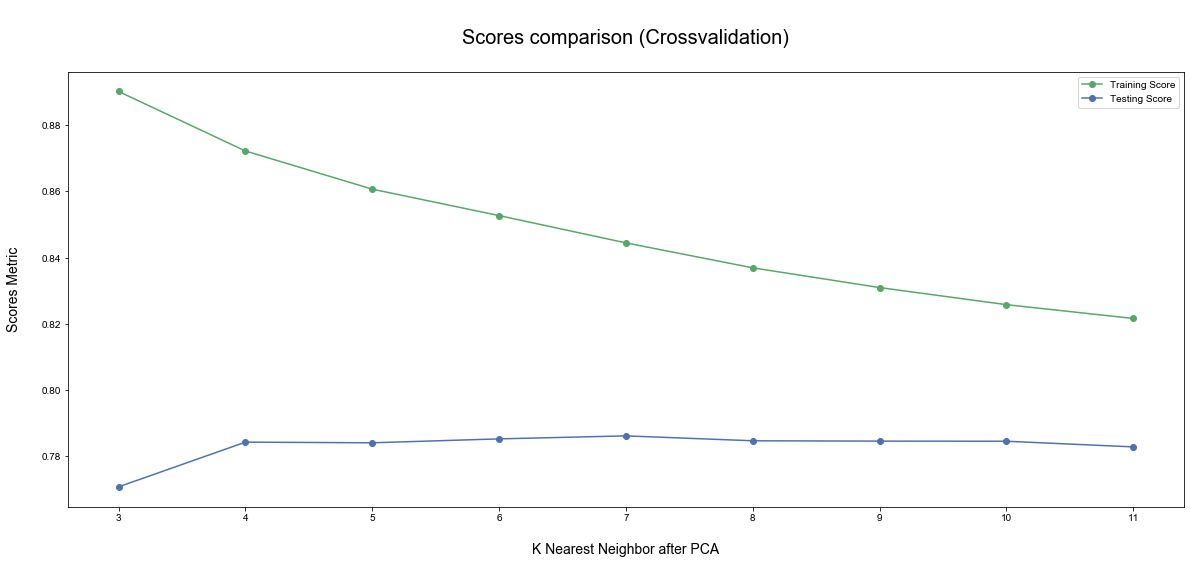

In [61]:
plt.figure(figsize=(20,8))
x_axis = list(range(3,12))
plt.plot(x_axis, results['mean_train_score'], c = 'g', label = 'Training Score',marker='o')
plt.plot(x_axis, results['mean_test_score'], c = 'b', label = 'Testing Score',marker='o')
plt.legend(loc='best')
plt.title('\nScores comparison (Crossvalidation)\n',fontsize=20)
plt.xlabel('\nK Nearest Neighbor after PCA',fontsize=14)
plt.ylabel('Scores Metric\n',fontsize=14)
sns.set()
plt.show();

Lets analyze the Crossvalidation testing score closely as we have to choose the best score

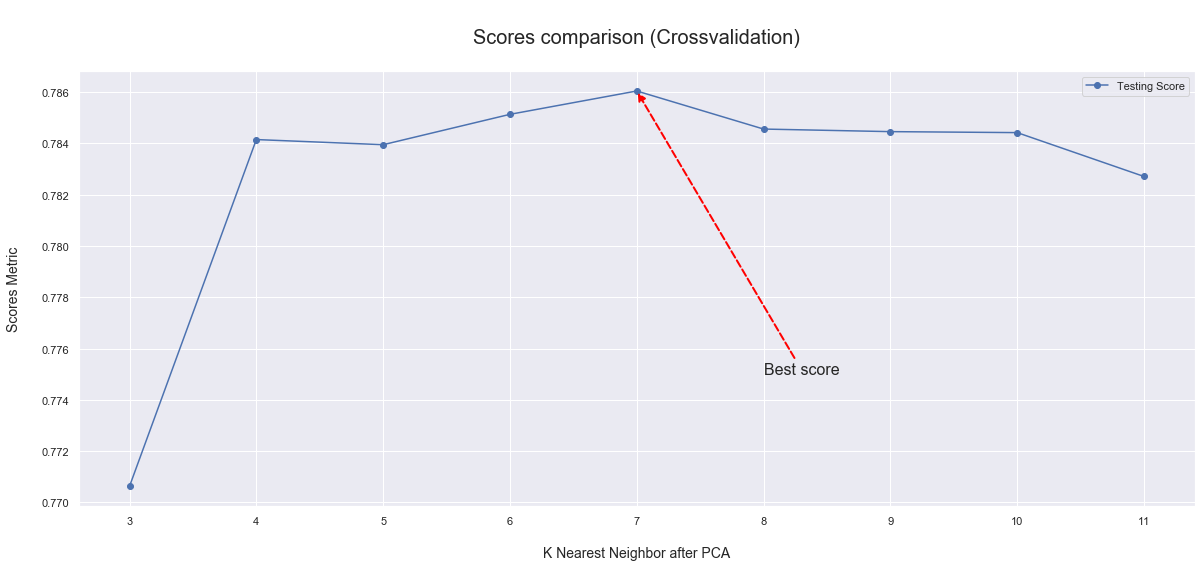

In [136]:
plt.figure(figsize=(20,8))
x_axis = list(range(3,12))
plt.plot(x_axis, results['mean_test_score'], c = 'b', label = 'Testing Score',marker='o')
plt.annotate("Best score",fontsize=16,xy=(7, 0.786047),xytext=(8, 0.775), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.legend(loc='best')
plt.title('\nScores comparison (Crossvalidation)\n',fontsize=20)
plt.xlabel('\nK Nearest Neighbor after PCA',fontsize=14)
plt.ylabel('Scores Metric\n',fontsize=14)
plt.show();

#del dict

<div class="alert alert-block alert-warning">
Let's Visualize the plot of the best fit line by the KNN model after PCA below for a sample of data with only one x variable and y variable for simplicity:
    <div>

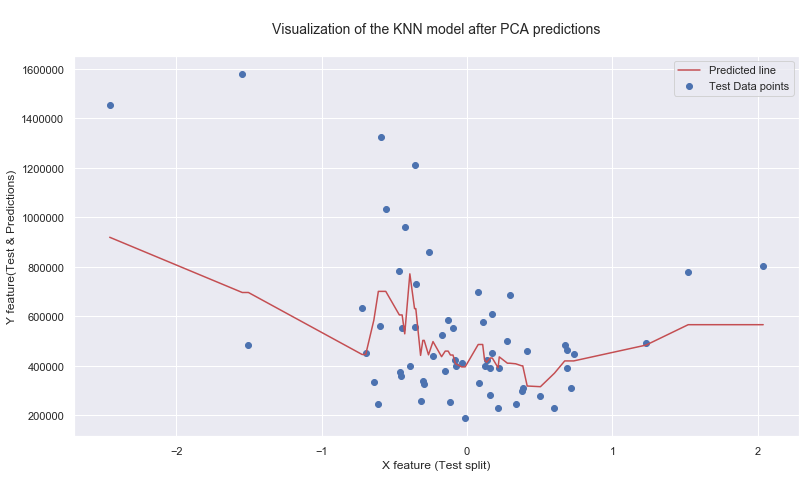

In [63]:
X_b = X_test_reduced[:60,10].reshape(-1,1)
y_b = y_test[:60]
knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_reduced[:60,10].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict = knn_reg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the KNN model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4">  Linear Regression after PCA</font></b>

In [64]:
from sklearn.linear_model import LinearRegression
lnreg=LinearRegression()
lnreg.fit(X_train_reduced, y_train)
print(f'\n\n Linear Regression Model and the metrics :\n')
print('\t• Training score of the Linear Regression Model is :',lnreg.score(X_train_reduced, y_train))
print('\n\t• Testing score of the Linear Regression Model is :',lnreg.score(X_test_reduced, y_test))
pred= lnreg.predict(X_test_reduced)
print(f'\n\t• Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))} \n\n\t• R2 Score: {r2_score(y_test,pred)}')



 Linear Regression Model and the metrics :

	• Training score of the Linear Regression Model is : 0.6995121718444323

	• Testing score of the Linear Regression Model is : 0.679489767825359

	• Root Mean Squared Error: 209770.0533794113 

	• R2 Score: 0.6794897678253589


<div class="alert alert-block alert-success">     

    
From the above results we can see that the simple linear model after PCA yields 
    R<sup>2</sup> score of `0.679489`. The test score is relatively close to the training score.
<div>

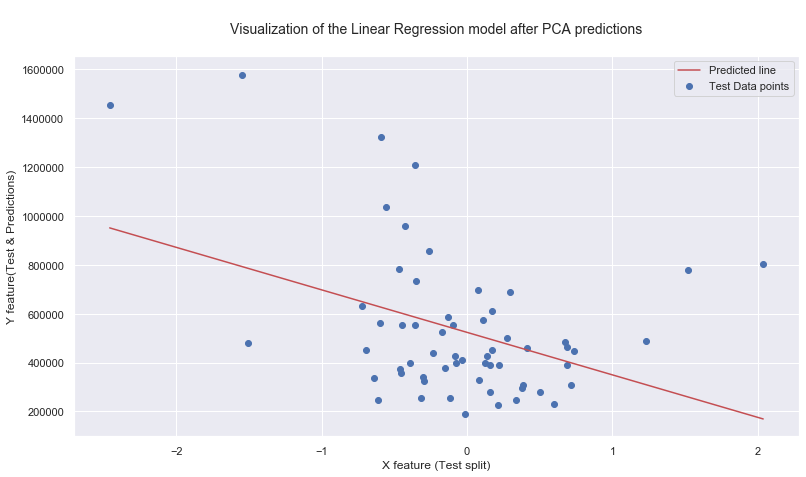

In [65]:
X_b = X_test_reduced[:60,10].reshape(-1,1)
y_b = y_test[:60]
lnreg=LinearRegression()
lnreg.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_reduced[:60,10].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict = lnreg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the Linear Regression model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4">  Ridge after PCA</font></b>

In [66]:
from sklearn.linear_model import Ridge

In [67]:
parameters = {'alpha': [0.01,0.1,1,20,35,50,70,100,105,110,115,120]}
ridge_reg = GridSearchCV(Ridge(random_state=0), parameters,return_train_score=True, cv=6, n_jobs=-1)
ridge_reg.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=0,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 20, 35, 50, 70, 100, 105, 110,
                                   115, 120]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [68]:
ridge_reg.score(X_test_reduced, y_test)
#R2 score

0.6793085532573531

In [69]:
print(f'Best parameters: {ridge_reg.best_params_}')
print(f'Best cross-validation score: {ridge_reg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'alpha': 120}
Best cross-validation score: 0.6944448597376299


In [70]:
result=pd.DataFrame(ridge_reg.cv_results_)

In [71]:
pred = ridge_reg.predict(X_test_reduced)
print('\nFor alpha =',result['param_alpha'][ridge_reg.best_index_])
print('\n\t• Cross validation Training score mean: ',result['mean_train_score'][ridge_reg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,ridge_reg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For alpha = 120

	• Cross validation Training score mean:  0.699730870772723

	• Cross validation Testing score mean:  0.6944448597376299

	• R2 Score:  0.6793085532573531

	• Root Mean Squared Error:  209829.34636629734
----------------------------------------------------------------------------


<div class="alert alert-block alert-danger">     

From the above results we can see that the Ridge model after PCA yields the best results when `alpha =120` which leads to the best R<sup>2</sup> score of `0.679308` and it's worse than simple linear regression. As alpha become larger, the r2 score is getting near to the result of simple linear regression. In addition, the test score is relatively close to the training score, which indicates that there's no need to regularize the model.
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  LASSO after PCA </font></b>

In [72]:
from sklearn.linear_model import Lasso

In [73]:
params = {'alpha': [0.001,0.01,0.1, 1, 20, 40, 60, 75 ,80, 85, 90, 100, 120]}
lasso_reg = GridSearchCV(Lasso(random_state=0), params,return_train_score=True, cv=6, n_jobs=-1)
lasso_reg.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 20, 40, 60, 75, 80, 85,
                                   90, 100, 120]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [74]:
lasso_reg.score(X_test_reduced, y_test)
#R2 score

0.679444174054967

In [75]:
print(f'Best parameters: {lasso_reg.best_params_}')
print(f'Best cross-validation score: {lasso_reg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'alpha': 120}
Best cross-validation score: 0.6943790035679536


In [76]:
result1=pd.DataFrame(lasso_reg.cv_results_)

In [77]:
preds = lasso_reg.predict(X_test_reduced)
print('\nFor alpha =',result1['param_alpha'][lasso_reg.best_index_])
print('\n\t• Cross validation Training score mean: ',result1['mean_train_score'][lasso_reg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,lasso_reg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,preds))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, preds)))
print('----------------------------------------------------------------------------')


For alpha = 120

	• Cross validation Training score mean:  0.6997602967833957

	• Cross validation Testing score mean:  0.6943790035679536

	• R2 Score:  0.679444174054967

	• Root Mean Squared Error:  209784.97313325526
----------------------------------------------------------------------------


<div class="alert alert-block alert-danger">     

From the above results we can see that the Lasso model after PCA yields the best results when `alpha = 120` which leads to the best R<sup>2</sup> score of `0.679444` and it's about the same as simple linear regression. 
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  Polynomial Regression after PCA </font></b>

In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
train_score_list = []
test_score_list = []

for n in range(1,4): 
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    print('\nFor degree =', n)
    lnreg.fit(X_train_poly,y_train)
    y_pred=lnreg.predict(X_test_poly)
    train_score_list.append(lnreg.score(X_train_poly,y_train))
    test_score_list.append(lnreg.score(X_test_poly, y_test))
    print('\n\t• Training score: ',train_score_list[-1])
    print('\n\t• Testing score: ',test_score_list[-1])
    print(f'\n\t• Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))} \n\n\t• R2 Score: {r2_score(y_test,y_pred)}')
    print('----------------------------------------------------------------------------')


For degree = 1

	• Training score:  0.6995121718444323

	• Testing score:  0.679489767825359

	• Root Mean Squared Error: 209770.0533794113 

	• R2 Score: 0.6794897678253589
----------------------------------------------------------------------------

For degree = 2

	• Training score:  0.821639803280489

	• Testing score:  0.816677938521137

	• Root Mean Squared Error: 158646.28454049432 

	• R2 Score: 0.816677938521137
----------------------------------------------------------------------------

For degree = 3

	• Training score:  0.8922982317604462

	• Testing score:  0.5603734788428977

	• Root Mean Squared Error: 245676.98931916486 

	• R2 Score: 0.5603734788428977
----------------------------------------------------------------------------


<div class="alert alert-block alert-danger">

From the above results we can see that the Polynomial Regression model after PCA yields the best results when `degree = 2`which leads to the best R<sup>2</sup> score of `0.816677` which is the maximum score of all the models we  build. 
<div>

<div class="alert alert-block alert-success">Let's visualize the best fitted line by the Polynomial Model after PCA

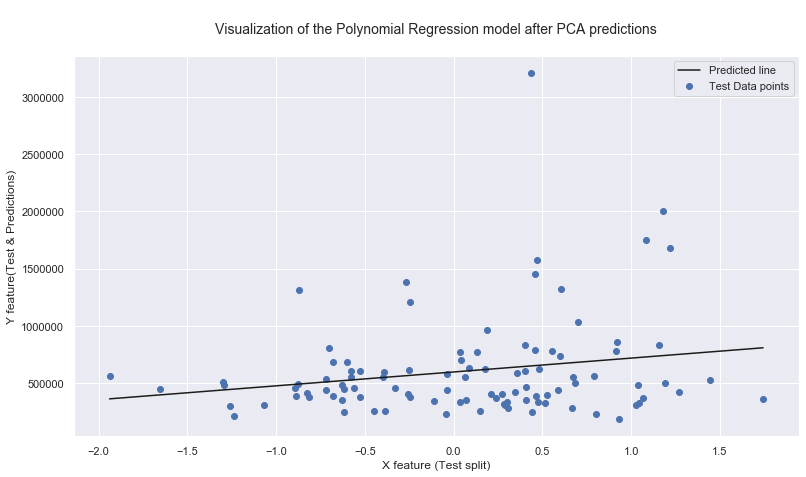

In [80]:
X_b = X_test_poly[:100,10].reshape(-1,1)
y_b = y_test[:100]
lnreg.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_poly[:100,10].tolist(),'y':y_test[:100].tolist()}).sort_values(by='x')
y_predict = lnreg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'k',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the Polynomial Regression model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4">  Linear Support Vector Regressor after PCA</font></b>

In [81]:
from sklearn.svm import LinearSVR

In [82]:
params_C = {'C': [0.01,0.1,1,10,100,1000,8450,9000]}
svreg = GridSearchCV(LinearSVR(random_state=0), params_C,return_train_score=True, cv=6, n_jobs=-1)
svreg.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=0, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 8450, 9000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [83]:
svreg.score(X_test_reduced, y_test)
#R2 score

0.6324167096587837

In [84]:
print(f'Best parameters: {svreg.best_params_}')
print(f'Best cross-validation score: {svreg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 9000}
Best cross-validation score: 0.6561900098373311


In [85]:
result3=pd.DataFrame(svreg.cv_results_)

In [86]:
y_preds = svreg.predict(X_test_reduced)
print('\nFor C =',result3['param_C'][svreg.best_index_])
print('\n\t• Cross validation Training score mean: ',result3['mean_train_score'][svreg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,svreg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,y_preds))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_preds)))
print('----------------------------------------------------------------------------')


For C = 9000

	• Cross validation Training score mean:  0.6575211400919033

	• Cross validation Testing score mean:  0.6561900098373311

	• R2 Score:  0.6324167096587838

	• Root Mean Squared Error:  224646.89474818012
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the Linear SVR Model after PCA

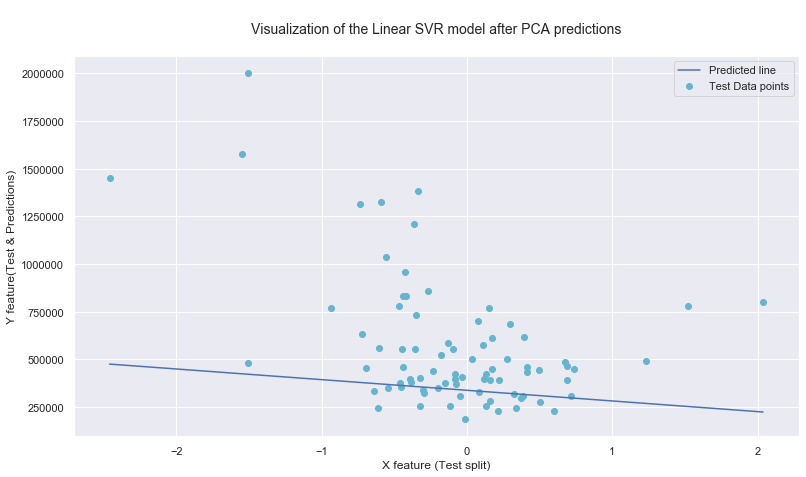

In [87]:
X_b = X_test_reduced[:80,10].reshape(-1,1)
y_b = y_test[:80]
svregt = LinearSVR(random_state=0,C=8450)
svregt.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_reduced[:80,10].tolist(),'y':y_test[:80].tolist()}).sort_values(by='x')
y_predict = svregt.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'b',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='c')
plt.title('\nVisualization of the Linear SVR model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Linear Support Vector Regressor model after PCA yields the best results when `C = 9000`which leads to the best R<sup>2</sup> score of `0.632416` 
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  SVM- Kernal RBF (Radial Bias Function) Regressor after PCA </font></b>

In [88]:
from sklearn.svm import SVR

In [89]:
param_grid = {'C': [0.01, 0.1, 1, 10, 1000, 5000],
              'gamma': [0.0001, 0.001, 0.1, 10, 1000]}
svregrbf = GridSearchCV(SVR(kernel='rbf'), param_grid, return_train_score=True, cv=6, n_jobs=-1)
svregrbf.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 1000, 5000],
                         'gamma': [0.0001, 0.001, 0.1, 10, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [90]:
svregrbf.score(X_test_reduced, y_test)
#R2 score

0.4586149957952993

In [91]:
print(f'Best parameters: {svregrbf.best_params_}')
print(f'Best cross-validation score: {svregrbf.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 5000, 'gamma': 0.001}
Best cross-validation score: 0.4492334669550038


In [92]:
result4=pd.DataFrame(svregrbf.cv_results_)

In [93]:
y_preds = svregrbf.predict(X_test_reduced)
print('\nFor C =',result4['param_C'][svregrbf.best_index_],'\nFor gamma =',result4['param_gamma'][svregrbf.best_index_])
print('\n\t• Cross validation Training score mean: ',result4['mean_train_score'][svregrbf.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,svregrbf.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,y_preds))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_preds)))
print('----------------------------------------------------------------------------')


For C = 5000 
For gamma = 0.001

	• Cross validation Training score mean:  0.4475874524871257

	• Cross validation Testing score mean:  0.4492334669550038

	• R2 Score:  0.4586149957952993

	• Root Mean Squared Error:  272631.259788983
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the SVM RBF model after PCA

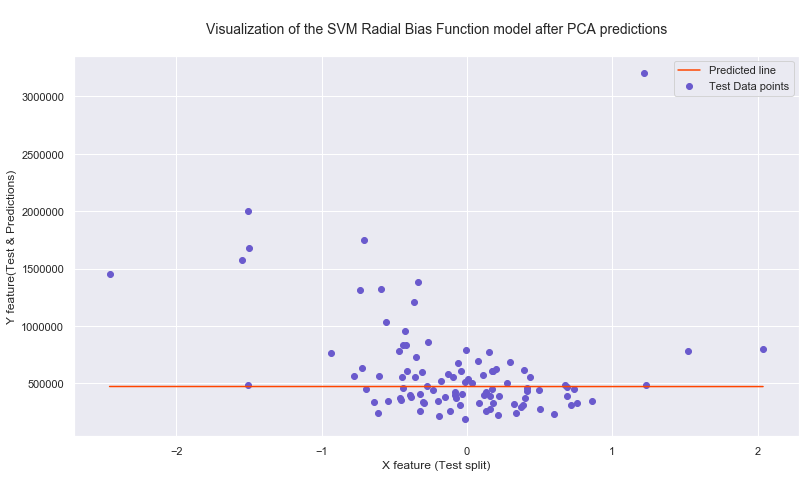

In [94]:
X_b = X_test_reduced[:100,10].reshape(-1,1)
y_b = y_test[:100]
svregt = SVR(kernel='rbf',gamma=0.001,C=5000)
svregt.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_reduced[:100,10].tolist(),'y':y_test[:100].tolist()}).sort_values(by='x')
y_predict = svregt.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'orangered',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='slateblue')
plt.title('\nVisualization of the SVM Radial Bias Function model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the SVM RBF model after PCA yields the best results when `C = 5000` and `gamma = 0.001` which leads to the best R<sup>2</sup> score of `0.458614`. It indicates the chosen model does not follow the trend of the data.
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  SVM- Kernal (Polynomial) Regressor after PCA </font></b>

In [95]:
from sklearn.svm import SVR

In [96]:
param_grids = {'C': [0.01,1,10,100,1000,5000],
              'degree': [1,3,5]}
svregpoly = GridSearchCV(SVR(kernel='poly'), param_grids ,return_train_score=True, cv=6, n_jobs=-1)
svregpoly.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 1, 10, 100, 1000, 5000],
                         'degree': [1, 3, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [97]:
svregpoly.score(X_test_reduced, y_test)
#R2 score

0.7174220820849138

In [98]:
print(f'Best parameters: {svregpoly.best_params_}')
print(f'Best cross-validation score: {svregpoly.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 5000, 'degree': 3}
Best cross-validation score: 0.6478918422957086


In [99]:
result5=pd.DataFrame(svregpoly.cv_results_)

In [100]:
y_prediction = svregpoly.predict(X_test_reduced)
print('\nFor C =',result5['param_C'][svregpoly.best_index_],'\nFor degree =',result5['param_degree'][svregpoly.best_index_])
print('\n\t• Cross validation Training score mean: ',result5['mean_train_score'][svregpoly.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,svregpoly.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,y_prediction))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('----------------------------------------------------------------------------')


For C = 5000 
For degree = 3

	• Cross validation Training score mean:  0.7150113429778974

	• Cross validation Testing score mean:  0.6478918422957086

	• R2 Score:  0.7174220820849138

	• Root Mean Squared Error:  196966.17435490954
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the SVM Polynomial model after PCA

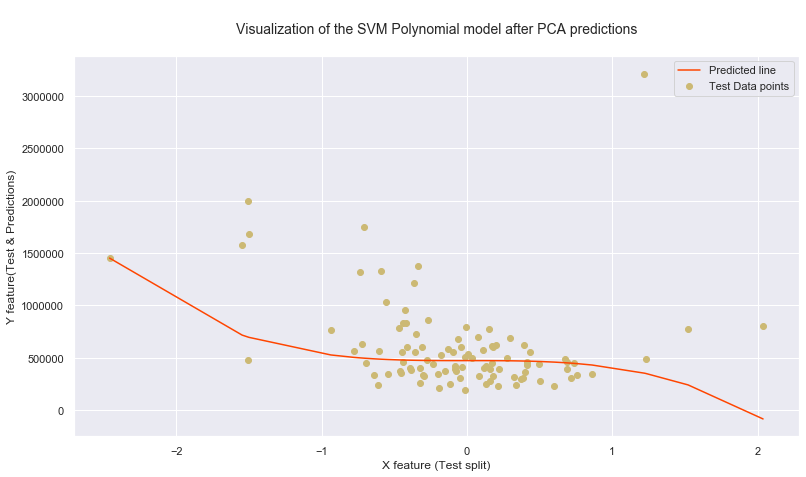

In [101]:
X_b = X_test_reduced[:100,10].reshape(-1,1)
y_b = y_test[:100]
svregt = SVR(kernel='poly',degree=3,C=5000)
svregt.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_reduced[:100,10].tolist(),'y':y_test[:100].tolist()}).sort_values(by='x')
y_predict = svregt.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'orangered',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='y')
plt.title('\nVisualization of the SVM Polynomial model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the SVM Polynomial model after PCA yields the best results when `C = 5000` and `degree = 3` which leads to the best R<sup>2</sup> score of `0.717422`. It indicates the chosen model does not follow the trend of the data.
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  SVM- Kernal (Linear) Regressor after PCA</font></b>

In [102]:
from sklearn.svm import SVR

In [103]:
param_c = {'C': [0.01, 0.1, 1, 10, 100, 1000, 5000]}
svreglinear = GridSearchCV(SVR(kernel='linear'), param_c ,return_train_score=True, cv=6, n_jobs=-1)
svreglinear.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [104]:
svreglinear.score(X_test_reduced, y_test)
#R2 score

0.6327325943894483

In [105]:
print(f'Best parameters: {svreglinear.best_params_}')
print(f'Best cross-validation score: {svreglinear.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 5000}
Best cross-validation score: 0.6565411774112354


In [106]:
result6=pd.DataFrame(svreglinear.cv_results_)

In [107]:
y_predictions = svreglinear.predict(X_test_reduced)
print('\nFor C =',result6['param_C'][svreglinear.best_index_])
print('\n\t• Cross validation Training score mean: ',result6['mean_train_score'][svreglinear.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,svreglinear.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,y_predictions))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('----------------------------------------------------------------------------')


For C = 5000

	• Cross validation Training score mean:  0.6578087192880959

	• Cross validation Testing score mean:  0.6565411774112354

	• R2 Score:  0.6327325943894483

	• Root Mean Squared Error:  224550.34822692827
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the SVM Linear model after PCA

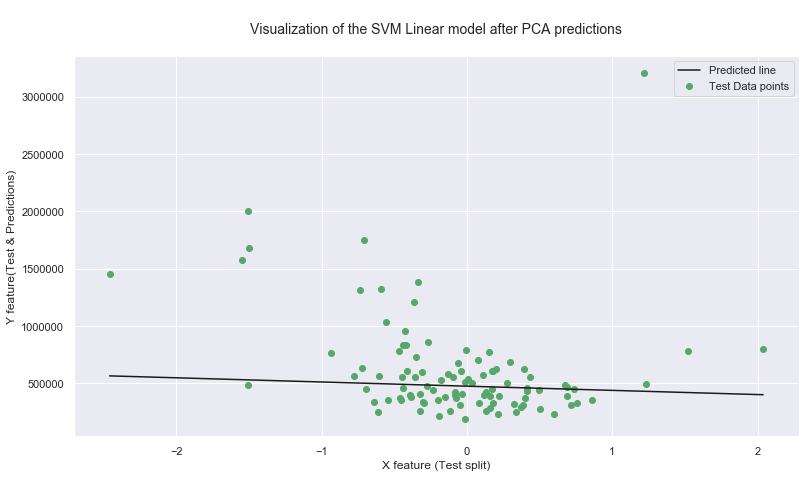

In [108]:
X_b = X_test_reduced[:100,10].reshape(-1,1)
y_b = y_test[:100]
svregt = SVR(kernel='linear',C=5000)
svregt.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_reduced[:100,10].tolist(),'y':y_test[:100].tolist()}).sort_values(by='x')
y_predict = svregt.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'k',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='g')
plt.title('\nVisualization of the SVM Linear model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the SVM RBF model after PCA yields the best results when `C = 5000` which leads to the best R<sup>2</sup> score of `0.632732`.
<div>

<div class="alert alert-block alert-info">
<b><font size="4">Artificial Neural Network</font></b>

In [109]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


<div class="alert alert-block alert-warning">
The optimizer and the loss are two arguments that are required if you want to compile the model.<br>Some of the most popular optimization algorithms used are the Stochastic Gradient Descent (SGD), ADAM and RMSprop<br><br>
 The choice for a loss function depends on the task:   <br>
 • In regression problem, we use the Mean Squared Error (MSE).  <br> 

 

In [110]:
# create model
model = Sequential()
model.add(Dense(300, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(94, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal'))
model.add(Dense(1,kernel_initializer='normal'))

In [111]:
# Compile model
model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [112]:
ann_result = model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
15129/15129 [==============================] - 1s 61us/step - loss: 197237391782.0810 - mse: 197237571584.0000
Epoch 2/100
15129/15129 [==============================] - 1s 50us/step - loss: 50082815611.4905 - mse: 50082836480.0000: 0s - loss: 55408498326.5882 - mse: 5540849
Epoch 3/100
15129/15129 [==============================] - 1s 49us/step - loss: 38471439845.6369 - mse: 38471446528.0000
Epoch 4/100
15129/15129 [==============================] - 1s 50us/step - loss: 34662388015.8361 - mse: 34662408192.0000
Epoch 5/100
15129/15129 [==============================] - 1s 54us/step - loss: 33382879247.7028 - mse: 33382846464.0000
Epoch 6/100
15129/15129 [==============================] - 1s 51us/step - loss: 32409397426.0104 - mse: 32409421824.0000
Epoch 7/100
15129/15129 [==============================] - 1s 48us/step - loss: 31934552992.4294 - mse: 31934576640.0000
Epoch 8/100
15129/15129 [==============================] - 1s 48us/step - loss: 31560422150.8531 - mse: 315

15129/15129 [==============================] - 1s 50us/step - loss: 19808431930.0903 - mse: 19808430080.0000
Epoch 66/100
15129/15129 [==============================] - 1s 50us/step - loss: 19551752954.5345 - mse: 19551760384.0000
Epoch 67/100
15129/15129 [==============================] - 1s 50us/step - loss: 19295446371.8178 - mse: 19295444992.0000
Epoch 68/100
15129/15129 [==============================] - 1s 50us/step - loss: 19032257517.7252 - mse: 19032256512.0000
Epoch 69/100
15129/15129 [==============================] - 1s 50us/step - loss: 18826542520.2882 - mse: 18826543104.0000
Epoch 70/100
15129/15129 [==============================] - 1s 50us/step - loss: 18529456579.1854 - mse: 18529445888.0000
Epoch 71/100
15129/15129 [==============================] - 1s 56us/step - loss: 18366701574.5654 - mse: 18366693376.0000
Epoch 72/100
15129/15129 [==============================] - 1s 55us/step - loss: 18177861085.2778 - mse: 18177857536.0000
Epoch 73/100
15129/15129 [===========

In [113]:
model.evaluate(X_train, y_train)

15129/15129 [==============================] - 0s 13us/step


[14557505136.525614, 14557500416.0]

In [114]:
model.evaluate(X_test, y_test)

6484/6484 [==============================] - 0s 12us/step


[16512994649.22887, 16512996352.0]

In [115]:
y_pred = model.predict(X_test)

In [116]:
r2_score(y_test, y_pred)
#R2 score

0.8797235056560291

In [117]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [118]:
print(f'Artificial Neural Network Metrics: ')
print(f'\n\t• Train score: {r2_score(y_train, y_train_predict)}')
print(f'\n\t• Test score: {r2_score(y_test, y_test_predict)}')
print(f'\n\t• Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print('----------------------------------------------------------------------------')

Artificial Neural Network Metrics: 

	• Train score: 0.8911157087393206

	• Test score: 0.8797235056560291

	• Root Mean Squared Error: 128502.89741678613
----------------------------------------------------------------------------


In [119]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               5700      
_________________________________________________________________
dense_2 (Dense)              (None, 94)                28294     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                3040      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 37,067
Trainable params: 37,067
Non-trainable params: 0
_________________________________________________________________


In [120]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,mse
0,1.972374e+11,1.972376e+11
1,5.008282e+10,5.008284e+10
2,3.847144e+10,3.847145e+10
3,3.466239e+10,3.466241e+10
4,3.338288e+10,3.338285e+10


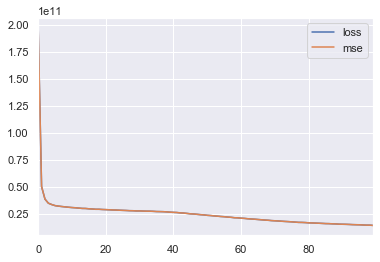

In [121]:
loss.plot();

<div class="alert alert-block alert-success">Let's visualize the best fitted line by the Artificial Neural Network Model 

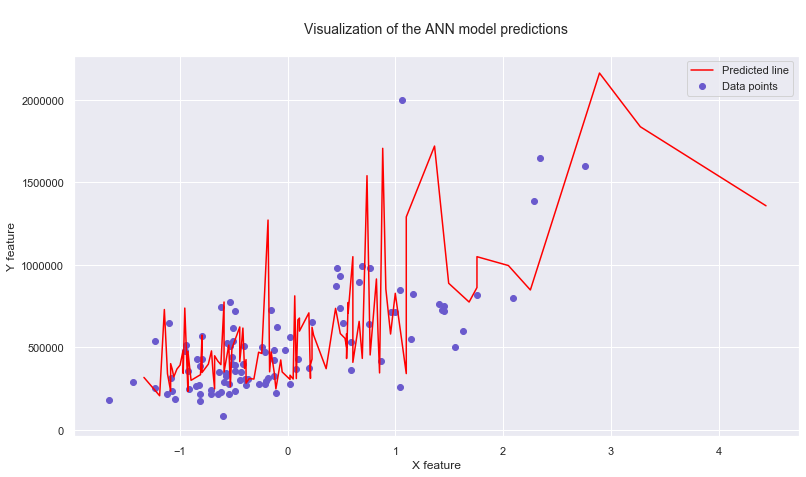

In [122]:
cm=pd.DataFrame({'x':X_test[:100,14].tolist(),'y':y_pred[:100].tolist()}).sort_values(by='x')
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), cm['y'].tolist(), c = 'red',label='Predicted line')
plt.scatter(X_train[:100,14].reshape(-1,1), y_train[:100],label='Data points',c='slateblue')
plt.title('\nVisualization of the ANN model predictions\n',fontsize=14)
plt.xlabel('X feature',fontsize=12)
plt.ylabel('Y feature',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Artificial Neural Network model yields the best R<sup>2</sup> score of `0.879723`. It is very close to the score of Gradient Boosting Regressor. 
<div>

<div class="alert alert-info" role="alert">
<b><font size="4">  Model Selection: </font></b>
    
Compare the performance before and after reduced the dimension of the data  
</div>

In [139]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Before PCA")
project1_result_table = pd.read_csv("project1_result_table.csv", index_col = 0)
project1_result_table
print("After PCA")
dict={'R2 Score':[0.780388,0.679489,0.679308,0.679444,0.816677,0.632416,0.458614,0.717422,0.632732],
      'RMSE':[173639,209770,209829,209784,158646,224646,272631,196966,224550],
      'Optimal Parameter':["n-neighbors = 7","None", "alpha = 120","alpha = 120", "degree = 2","C = 9000","C = 5000, gamma = 0.001","C = 5000, degree = 3","C = 5000"]}
model_results= pd.DataFrame(dict,index=['KNN Regressor','Simple Linear Regression','Ridge Regression','Lasso Regression', 
                                        'Polynomial Regression', 'Linear Support Vector Regressor', 'SVM- Kernal (RBF) Regressor', 
                                        'SVM- Kernal (Poly) Regressor','SVM- Kernal (Linear) Regressor'])
print('\n\n Metrics Summary of all Models(sorted based on R2 score):')
display(model_results.sort_values(by=['R2 Score'],ascending=False))

Before PCA


,R2 Score,RMSE,Optimal Parameter
Polynomial Regression,0.822081,152220,degree = 2
KNN Regressor,0.790696,165101,n-neighbors = 7
SVM- Kernal (Poly) Regressor,0.713549,193146,"C = 5000, degree = 3"
Ridge Regression,0.710942,194023,alpha = 120
Simple Linear Regression,0.710877,194045,None
Lasso Regression,0.710862,194050,alpha = 120
SVM- Kernal (Linear) Regressor,0.670674,207097,C = 5000
Linear Support Vector Regressor,0.670477,207159,C = 9000
SVM- Kernal (RBF) Regressor,0.472081,262207,"C = 5000, gamma = 0.001"


After PCA


 Metrics Summary of all Models(sorted based on R2 score):


,R2 Score,RMSE,Optimal Parameter
Polynomial Regression,0.816677,158646,degree = 2
KNN Regressor,0.780388,173639,n-neighbors = 7
SVM- Kernal (Poly) Regressor,0.717422,196966,"C = 5000, degree = 3"
Simple Linear Regression,0.679489,209770,None
Lasso Regression,0.679444,209784,alpha = 120
Ridge Regression,0.679308,209829,alpha = 120
SVM- Kernal (Linear) Regressor,0.632732,224550,C = 5000
Linear Support Vector Regressor,0.632416,224646,C = 9000
SVM- Kernal (RBF) Regressor,0.458614,272631,"C = 5000, gamma = 0.001"


<div class="alert alert-block alert-danger">
<b> After all model applied PCA, R2 score has slightly decrease and RMSE has increase, which indicates the results not as good as before.</font></b>
    
</div>

In [141]:
dict={'R2 Score':[0.661966,0.803245,0.662582, 0.866780, 0.651282, 0.658175, 0.902947, 0.879723],
      'RMSE':[215427, 164355, 215231, 135240, 218806, 216632, 115432, 128502],
      'Optimal Parameter':["max features = 10, max samples = 0.1 , n_estimators = 200", "max features = 10 , n_estimators = 300", "max features = 10 , max samples = 0.1 , n_estimators = 200", 
                           "max features = 10 , max_samples = 0.5 , n_estimators = 300", "learning rate = 0.05 , loss = linear , n_estimators = 50", "learning rate = 0.05 , loss = linear , n_estimators = 50",
                          "learning rate = 0.1, max depth = 5, max features = 10, max estimators = 200", "kernel_initializer = normal, activation = relu, optimizer = adam"]}
model_results= pd.DataFrame(dict,index=['Linear Regression with Bagging','KNN with Bagging','Lasso with Pasting','Decision Tree Regression with Pasting', 
                                        'Adaboost Boosting with Linear Regression', 'Adaboost Boosting with Decision Tree', 'Gradient Boosting Regression', 
                                        'Artificial Neural Network'])
print('\n\n Metrics Summary of all Models(sorted based on R2 score):')
display(model_results.sort_values(by=['R2 Score'],ascending=False))



 Metrics Summary of all Models(sorted based on R2 score):


,R2 Score,RMSE,Optimal Parameter
Gradient Boosting Regression,0.902947,115432,"learning rate = 0.1, max depth = 5, max featur..."
Artificial Neural Network,0.879723,128502,"kernel_initializer = normal, activation = relu..."
Decision Tree Regression with Pasting,0.866780,135240,"max features = 10 , max_samples = 0.5 , n_esti..."
KNN with Bagging,0.803245,164355,"max features = 10 , n_estimators = 300"
Lasso with Pasting,0.662582,215231,"max features = 10 , max samples = 0.1 , n_esti..."
Linear Regression with Bagging,0.661966,215427,"max features = 10, max samples = 0.1 , n_estim..."
Adaboost Boosting with Decision Tree,0.658175,216632,"learning rate = 0.05 , loss = linear , n_estim..."
Adaboost Boosting with Linear Regression,0.651282,218806,"learning rate = 0.05 , loss = linear , n_estim..."


<div class="alert alert-block alert-warning">
    
<font size="4">`Gradient Boosting Regression` and `Neural Network` are the best model among all. It is also surprisingly that the baseline `Decision Tree Regression` model with pasting yield really good results. </font>

</div>